# Machine Learning Final Exam Project
## Calista Lianardi - 2702325880 - LE09
## 2. Clothing Company Customer Clustering


### 0. Importing Important Library

In [ ]:
#Importing Important Libraries

#Basic EDA Library
import pandas as pd
import numpy as np

#Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Library
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

#Machine Learning Model
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.feature_selection import VarianceThreshold

#Additional Library
from datetime import datetime

# Remove warnings
from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### 2.A. Exploratory Data Analysis

#### <span style='color:blue'>Data Preprocessing</span>

In [ ]:
#Loading the dataset

df2 = pd.read_csv('2A.tsv', sep = '\t')
df2.head()

Customer ID  Birth Date Gender Item Purchased  Category  \
0            1  1969/03/05   Male         Blouse  Clothing   
1            2  2005/07/01   Male        Sweater  Clothing   
2            3  1974/12/01   Male          Jeans  Clothing   
3            4  2003/11/21   Male        Sandals  Footwear   
4            5  1979/09/13   Male         Blouse  Clothing   

   Purchase Amount (USD)       Location Size      Color  Season  \
0                     53       Kentucky    L       Gray  Winter   
1                     64          Maine    L     Maroon  Winter   
2                     73  Massachusetts    S     Maroon  Spring   
3                     90   Rhode Island    M     Maroon  Spring   
4                     49         Oregon    M  Turquoise  Spring   

   Review Rating Subscription Status Payment Method  Shipping Type  \
0            3.1                 Yes    Credit Card        Express   
1            3.1                 Yes  Bank Transfer        Express   
2            3.1                 Yes           Cash  Free Shipping   
3            3.5                 Yes         PayPal   Next Day Air   
4            2.7                 Yes           Cash  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases  \
0              Yes             Yes                  14   
1              Yes             Yes                   2   
2              Yes             Yes                  23   
3              Yes             Yes                  49   
4              Yes             Yes                  31   

  Preferred Payment Method Frequency of Purchases  
0                    Venmo            Fortnightly  
1                     Cash            Fortnightly  
2              Credit Card                 Weekly  
3                   PayPal                 Weekly  
4                   PayPal               Annually

In [ ]:
#Checking the dataset summary

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Birth Date                3900 non-null   object 
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
df2.describe()

Customer ID  Purchase Amount (USD)  Review Rating  Previous Purchases
count  3900.000000            3900.000000    3900.000000         3900.000000
mean   1950.500000              59.764359       3.749949           25.351538
std    1125.977353              23.685392       0.716223           14.447125
min       1.000000              20.000000       2.500000            1.000000
25%     975.750000              39.000000       3.100000           13.000000
50%    1950.500000              60.000000       3.700000           25.000000
75%    2925.250000              81.000000       4.400000           38.000000
max    3900.000000             100.000000       5.000000           50.000000

In [ ]:
#Checking the unique value in each categorical column

df2_cat = df2.select_dtypes(include=['object']).columns
df2_cat = df2_cat.tolist()
df2_cat

for i in df2_cat:
    print(df2[i].value_counts())
    print()

Birth Date
1970/12/28    3
1965/08/28    3
1966/12/27    3
1970/08/27    3
1969/05/14    3
             ..
1985/06/23    1
1996/09/02    1
1984/01/21    1
1972/03/05    1
1980/03/30    1
Name: count, Length: 3534, dtype: int64

Gender
Male      2642
Female    1231
f           17
M           10
Name: count, dtype: int64

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Location
Montana           96
California        95
Idaho             9

In [ ]:
# Check for missing values
df2.isnull().sum()

Customer ID                 0
Birth Date                  0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [ ]:
#Checking duplicated row
df2.duplicated().sum()

0

Seems like this dataset is clean, the only problem seen is the anomaly value in Gender column

### <span style='color:blue'>Handling Anomalies</span>

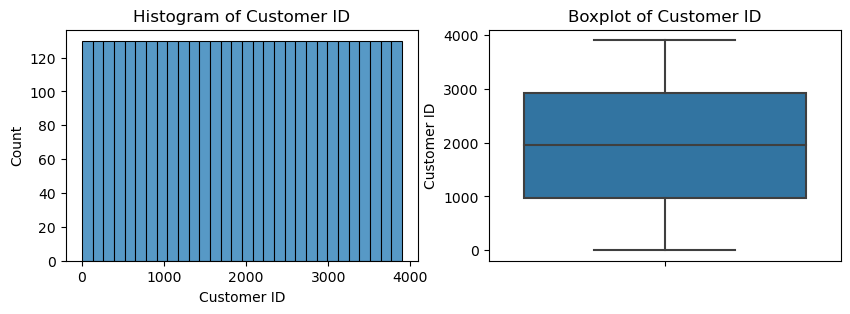

Skewness Customer ID: 0.0
Kurtosis Customer ID: -1.1999999999999997


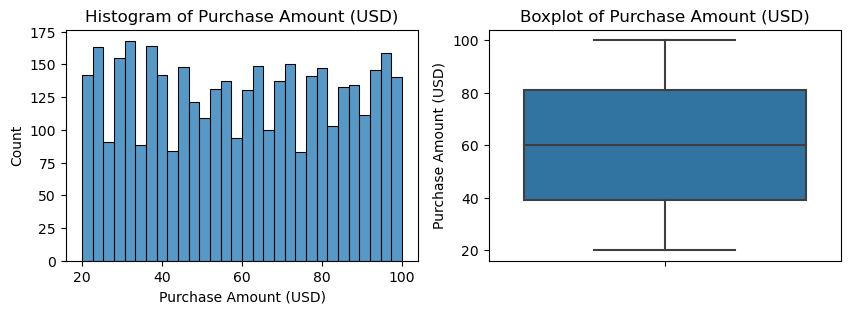

Skewness Purchase Amount (USD): 0.012701757626433795
Kurtosis Purchase Amount (USD): -1.236593691266159


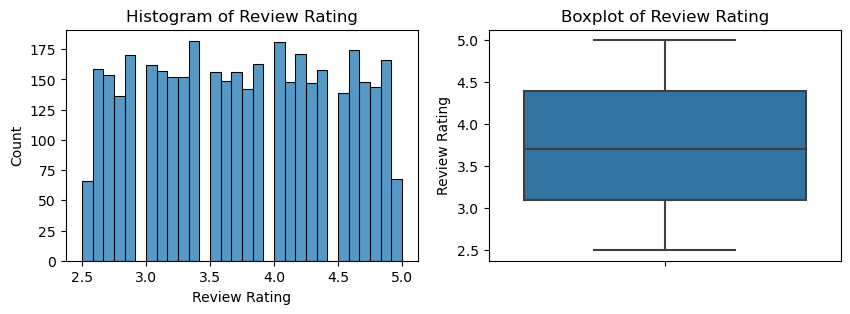

Skewness Review Rating: 0.00452459644246527
Kurtosis Review Rating: -1.1796283021299137


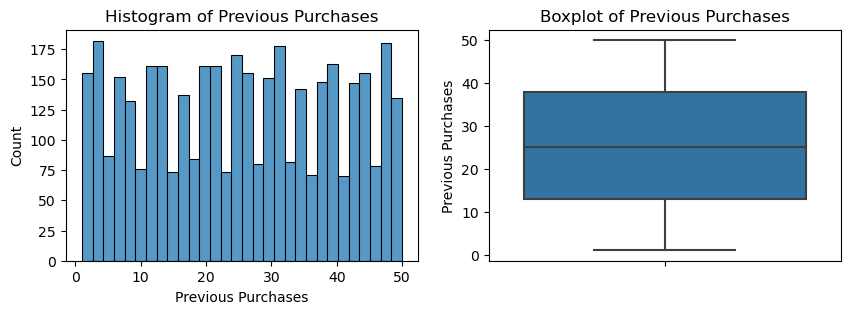

Skewness Previous Purchases: 0.0031211555127652127
Kurtosis Previous Purchases: -1.1901873846405375


In [ ]:
#Evaluating distribution and outlier from the numericla column

#Taking the numerical column
df2_num = df2.select_dtypes(include=['float64', 'int64']).columns.tolist()

def check_distribution_outliers(df, columns):
    for i in columns:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(df[i], bins=30)
        plt.title(f'Histogram of {i}')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[i])
        plt.title(f'Boxplot of {i}')

        plt.show()

        print(f'Skewness {i}:', df[i].skew())
        print(f'Kurtosis {i}:', df[i].kurt())

check_distribution_outliers(df2, df2_num)

Okay no outlier and normal distribution on all numerical category

In [ ]:
#Cleaning anomalies in categorical column (especially 'Gender')

val_dict = {
    'Female': 'Female',
    'f': 'Female',
    'Male': 'Male',
    'M': 'Male'
}

df2['Gender'] = df2['Gender'].map(val_dict)

df2['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

Birth Date Value Counts:
Birth Date
1970/12/28    3
1965/08/28    3
1966/12/27    3
1970/08/27    3
1969/05/14    3
             ..
1985/06/23    1
1996/09/02    1
1984/01/21    1
1972/03/05    1
1980/03/30    1
Name: count, Length: 3534, dtype: int64




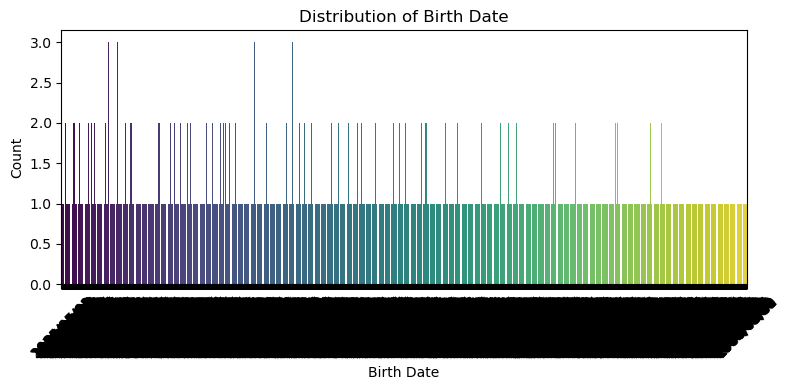

Gender Value Counts:
Gender
Male      2652
Female    1248
Name: count, dtype: int64




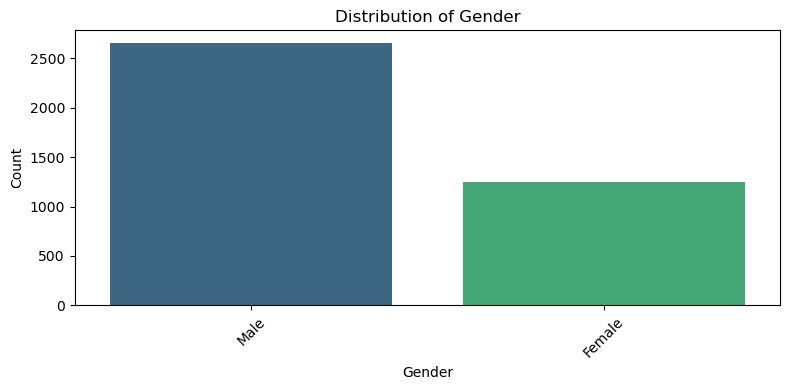

Item Purchased Value Counts:
Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64




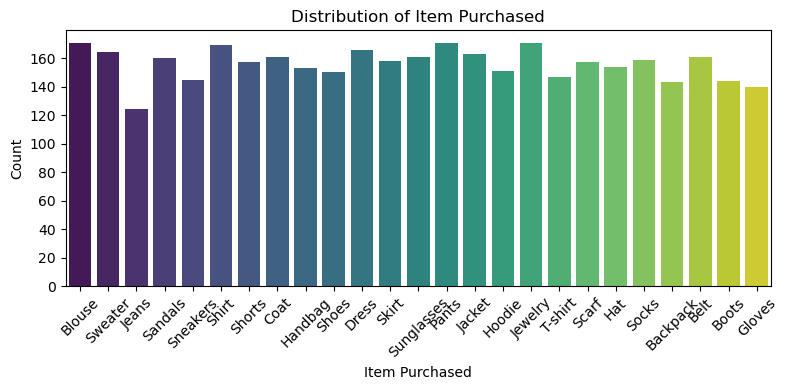

Category Value Counts:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64




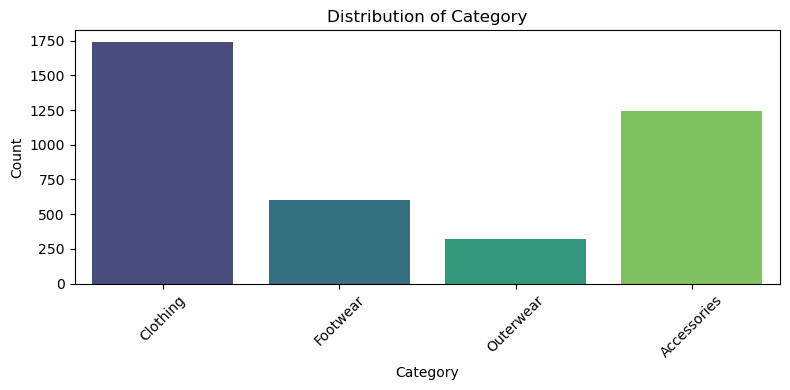

Location Value Counts:
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Ha

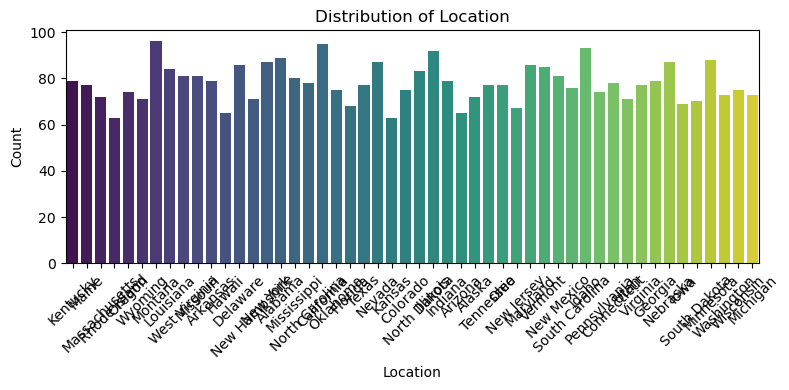

Size Value Counts:
Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64




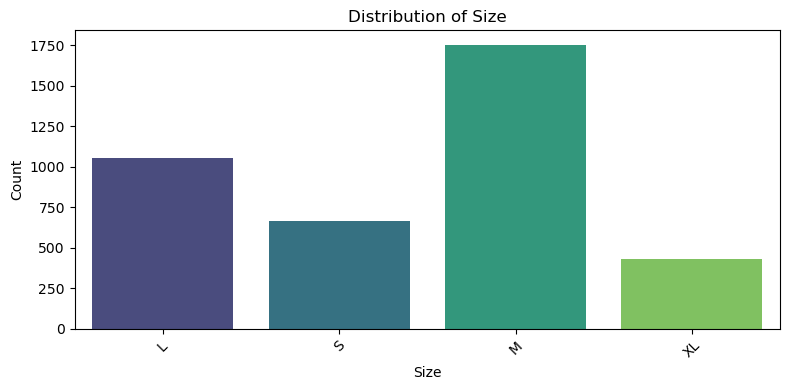

Color Value Counts:
Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64




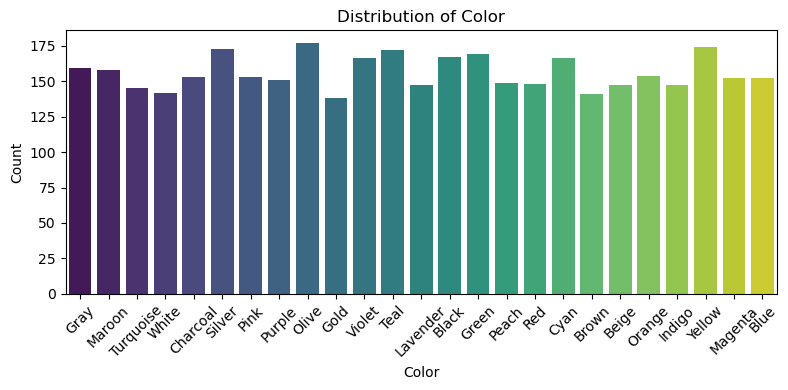

Season Value Counts:
Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64




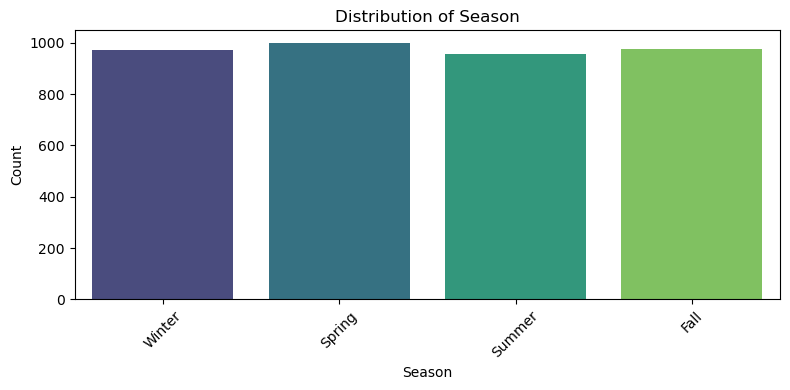

Subscription Status Value Counts:
Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64




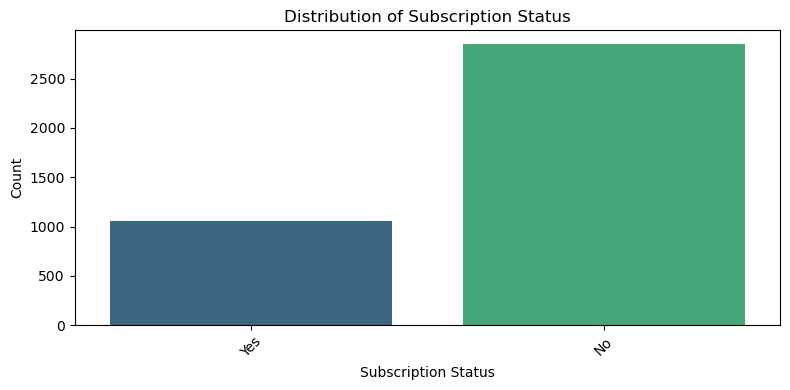

Payment Method Value Counts:
Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64




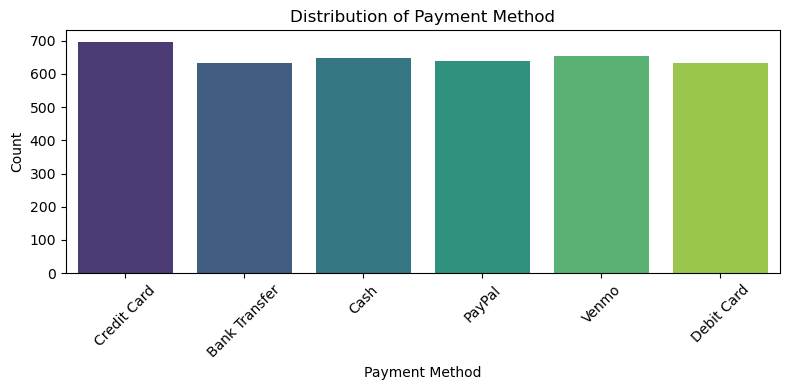

Shipping Type Value Counts:
Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64




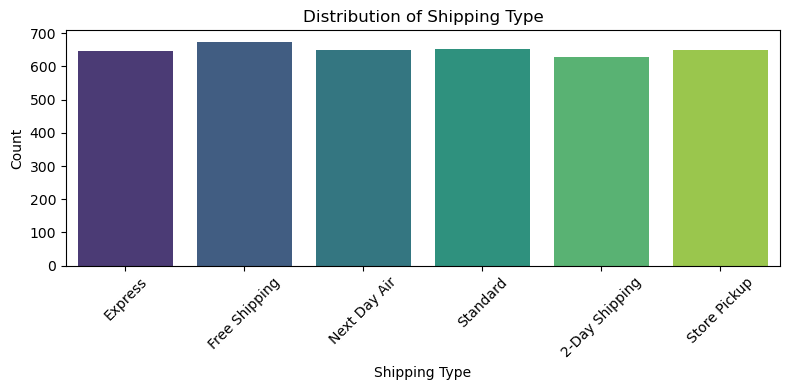

Discount Applied Value Counts:
Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64




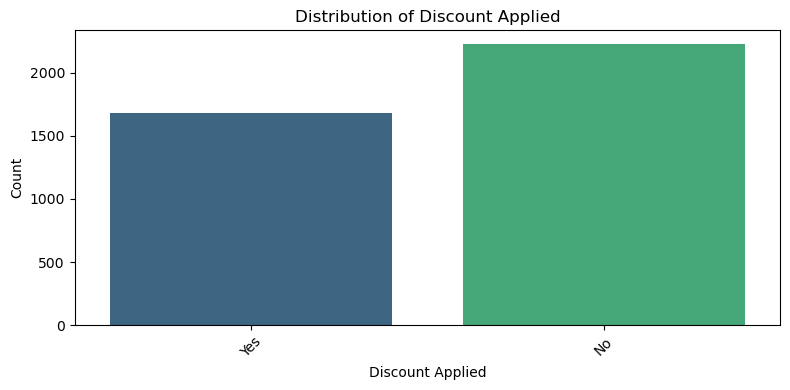

Promo Code Used Value Counts:
Promo Code Used
No     2223
Yes    1677
Name: count, dtype: int64




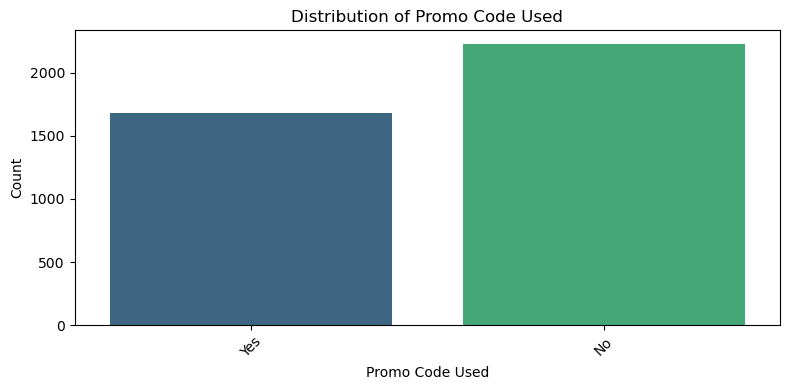

Preferred Payment Method Value Counts:
Preferred Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64




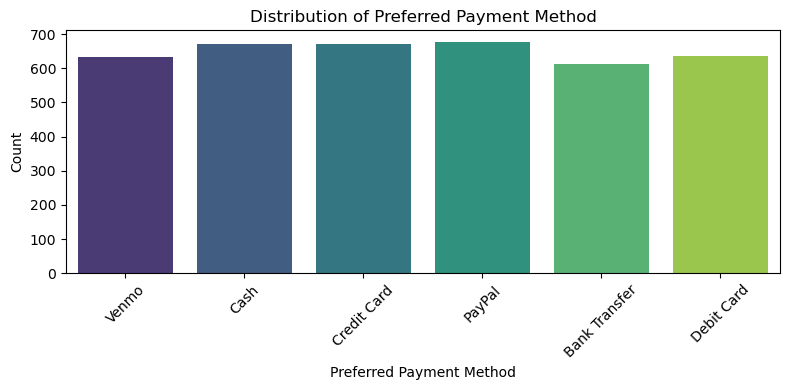

Frequency of Purchases Value Counts:
Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64




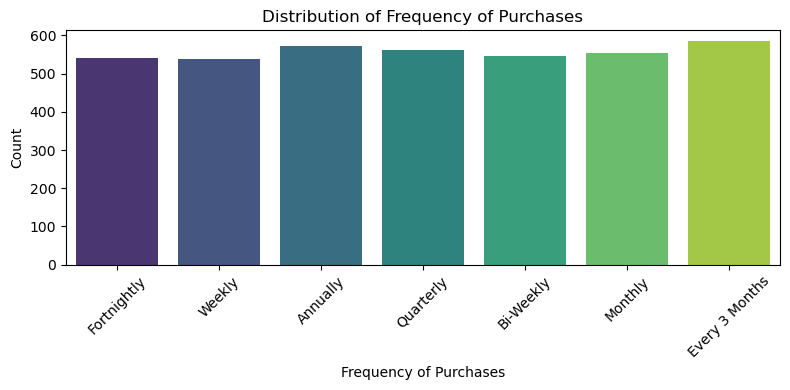

In [ ]:
#Plotting the categorical variable

df2_cat = df2.select_dtypes(include=['object']).columns.tolist()


# Function to plot countplots for categorical features
def plot_categorical_distribution(data, feature):
    print(f"{feature} Value Counts:")
    print(data[feature].value_counts())
    print("\n")

    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=data, palette='viridis')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting the desired categorical features
for col in df2_cat:
    plot_categorical_distribution(df2, col)


We can see some interesting fact from the plot distribution, although there are some "too much to be plotted" variable such as birthdate. But the other distribution might give us some insight such as:
1. The customer from this company are dominated by Male than Female
2. The most item bought are Blouse, Jewelry, and Pants, quite a turnback than fact number 1 but let's give the assumption of although Woman user are less than Men, Woman are tend to buy multiple item at the same time than Men, this might be interesting to be unfold further
3. The most category bought are CLothing, followed by accessories and then other 2 category, where company could put in mind for their stock availability
4. Most of the buyer come from Montana, and the country with least buyer are Rhode Island
5. The most bought size are M, while the last are XL, same as category, company could put this to mind by keeping the stock align with the market
6. Somehow the favourite colour is Olive
7. The season are distributed so well indicating consistent customer from this company, not a seasonal
8. There's 3/4 customer that hasn't subscribe to the company yet
9. Mostly customer pay using Credit Card, but the preferred payment method are usually PayPal, not sure why this happen, although same as shipping type and frequency of purchases, it distributed well so no trend seen
10. 2/3 customer still not using discount and promo code, indicating 2/3 customer of this company is not that price-sensitive, or might not be aware of their existence

i would love to do further analysis for grouping by gender, but this is clustering case not classification, and i suppose the exploratory insight are sufficient at this point, so let's do it in another time and focus on the clustering instead

#### Feature Engineering

In [ ]:
#Creating 'Age' column derived from birth date
#(assuming the dataset are documented in 2025)

current_year = datetime.now().year
df2['Birth Date'] = pd.to_datetime(df2['Birth Date'], errors = 'coerce')
df2['Age'] = current_year - df2['Birth Date'].dt.year

df2.head()

Customer ID Birth Date Gender Item Purchased  Category  \
0            1 1969-03-05   Male         Blouse  Clothing   
1            2 2005-07-01   Male        Sweater  Clothing   
2            3 1974-12-01   Male          Jeans  Clothing   
3            4 2003-11-21   Male        Sandals  Footwear   
4            5 1979-09-13   Male         Blouse  Clothing   

   Purchase Amount (USD)       Location Size      Color  Season  \
0                     53       Kentucky    L       Gray  Winter   
1                     64          Maine    L     Maroon  Winter   
2                     73  Massachusetts    S     Maroon  Spring   
3                     90   Rhode Island    M     Maroon  Spring   
4                     49         Oregon    M  Turquoise  Spring   

   Review Rating Subscription Status Payment Method  Shipping Type  \
0            3.1                 Yes    Credit Card        Express   
1            3.1                 Yes  Bank Transfer        Express   
2            3.1                 Yes           Cash  Free Shipping   
3            3.5                 Yes         PayPal   Next Day Air   
4            2.7                 Yes           Cash  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases  \
0              Yes             Yes                  14   
1              Yes             Yes                   2   
2              Yes             Yes                  23   
3              Yes             Yes                  49   
4              Yes             Yes                  31   

  Preferred Payment Method Frequency of Purchases  Age  
0                    Venmo            Fortnightly   56  
1                     Cash            Fortnightly   20  
2              Credit Card                 Weekly   51  
3                   PayPal                 Weekly   22  
4                   PayPal               Annually   46

In [ ]:
#Standardize the "Frecuency of Purchase" Column
#as it cannot be standardize using encoder

#this frquency are mapped per daily count
freq_map = {
    "Daily": 365,
    "Weekly": 52,
    "Bi-Weekly": 26,
    "Fortnightly": 26,
    "Monthly": 12,
    "Every 3 Months": 4,
    "Quarterly": 4,
    "Annually": 1
}

df2['Frequency of Purchases'] = df2['Frequency of Purchases'].map(freq_map)
df2.head()

Customer ID Birth Date Gender Item Purchased  Category  \
0            1 1969-03-05   Male         Blouse  Clothing   
1            2 2005-07-01   Male        Sweater  Clothing   
2            3 1974-12-01   Male          Jeans  Clothing   
3            4 2003-11-21   Male        Sandals  Footwear   
4            5 1979-09-13   Male         Blouse  Clothing   

   Purchase Amount (USD)       Location Size      Color  Season  \
0                     53       Kentucky    L       Gray  Winter   
1                     64          Maine    L     Maroon  Winter   
2                     73  Massachusetts    S     Maroon  Spring   
3                     90   Rhode Island    M     Maroon  Spring   
4                     49         Oregon    M  Turquoise  Spring   

   Review Rating Subscription Status Payment Method  Shipping Type  \
0            3.1                 Yes    Credit Card        Express   
1            3.1                 Yes  Bank Transfer        Express   
2            3.1                 Yes           Cash  Free Shipping   
3            3.5                 Yes         PayPal   Next Day Air   
4            2.7                 Yes           Cash  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases  \
0              Yes             Yes                  14   
1              Yes             Yes                   2   
2              Yes             Yes                  23   
3              Yes             Yes                  49   
4              Yes             Yes                  31   

  Preferred Payment Method  Frequency of Purchases  Age  
0                    Venmo                      26   56  
1                     Cash                      26   20  
2              Credit Card                      52   51  
3                   PayPal                      52   22  
4                   PayPal                       1   46

##### Dropping the unnecessary columns

There will be 5 dropped column from this dataset,
1. Customer ID: seems like the customer ID are the unique identifier with no analytical value
2. Birth Date: already derived into customer age, so probably become redundant
3. Item Purchased: too specific and already represented by Category, possible redundant information
4. Color: Unlikely contribute meaningful clustering
5. Preferred Payment Method: Overlaps with Payment Method, although there might be different value, there's still no valuable insight from it

In [ ]:
df2 = df2.drop(columns = ['Customer ID', 'Birth Date', 'Item Purchased', 'Color', 'Preferred Payment Method'])
df2.head()

Gender  Category  Purchase Amount (USD)       Location Size  Season  \
0   Male  Clothing                     53       Kentucky    L  Winter   
1   Male  Clothing                     64          Maine    L  Winter   
2   Male  Clothing                     73  Massachusetts    S  Spring   
3   Male  Footwear                     90   Rhode Island    M  Spring   
4   Male  Clothing                     49         Oregon    M  Spring   

   Review Rating Subscription Status Payment Method  Shipping Type  \
0            3.1                 Yes    Credit Card        Express   
1            3.1                 Yes  Bank Transfer        Express   
2            3.1                 Yes           Cash  Free Shipping   
3            3.5                 Yes         PayPal   Next Day Air   
4            2.7                 Yes           Cash  Free Shipping   

  Discount Applied Promo Code Used  Previous Purchases  \
0              Yes             Yes                  14   
1              Yes             Yes                   2   
2              Yes             Yes                  23   
3              Yes             Yes                  49   
4              Yes             Yes                  31   

   Frequency of Purchases  Age  
0                      26   56  
1                      26   20  
2                      52   51  
3                      52   22  
4                       1   46

### 2. B Model Training using K-Means

### <span style='color:blue'> Preparing Data For Modeling </span>

In [ ]:
#Encoing Categorical Variable

#Seeing the category distribution of categorical variable
df2_cat = df2.select_dtypes(include=['object']).columns
df2_cat = df2_cat.tolist()
df2_cat

for i in df2_cat:
    print(df2[i].value_counts())
    print()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts

For Clustering, the data need to be encoded into numerical representation as clustering algorithm rely on distance calculations

We can find 3 kind of encoding here, such as:
1. Label Encoding: Label encoding are given to variable with natural order or binary variable, which in this dataset are Gender, Subscription Status, Discount Applied, Promo Code Used
2. Ordinal Encoding: used when there are ordinal data that don't have natural order, so we need to order it using map, which in this dataset are Size
3. One-Hot Encoding: Used for nominal data, the data that doesn't have any order, which in this dataset are Category, Location, Season, Payment Method, and Shipping Type, this are done useing pd.get_dummies

In [ ]:
#Label Encoding

label_col = ['Gender', 'Subscription Status', 'Discount Applied', 'Promo Code Used']

label_encoder = LabelEncoder()

for i in label_col:
    df2[i] = label_encoder.fit_transform(df2[i])

df2.head()

Gender  Category  Purchase Amount (USD)       Location Size  Season  \
0       1  Clothing                     53       Kentucky    L  Winter   
1       1  Clothing                     64          Maine    L  Winter   
2       1  Clothing                     73  Massachusetts    S  Spring   
3       1  Footwear                     90   Rhode Island    M  Spring   
4       1  Clothing                     49         Oregon    M  Spring   

   Review Rating  Subscription Status Payment Method  Shipping Type  \
0            3.1                    1    Credit Card        Express   
1            3.1                    1  Bank Transfer        Express   
2            3.1                    1           Cash  Free Shipping   
3            3.5                    1         PayPal   Next Day Air   
4            2.7                    1           Cash  Free Shipping   

   Discount Applied  Promo Code Used  Previous Purchases  \
0                 1                1                  14   
1                 1                1                   2   
2                 1                1                  23   
3                 1                1                  49   
4                 1                1                  31   

   Frequency of Purchases  Age  
0                      26   56  
1                      26   20  
2                      52   51  
3                      52   22  
4                       1   46

In [ ]:
#Ordinal Encoding

size_map = {'M': 0, 'L': 1, 'S': 2, 'XL': 3}
df2['Size'] = df2['Size'].map(size_map)
df2.head()

Gender  Category  Purchase Amount (USD)       Location  Size  Season  \
0       1  Clothing                     53       Kentucky     1  Winter   
1       1  Clothing                     64          Maine     1  Winter   
2       1  Clothing                     73  Massachusetts     2  Spring   
3       1  Footwear                     90   Rhode Island     0  Spring   
4       1  Clothing                     49         Oregon     0  Spring   

   Review Rating  Subscription Status Payment Method  Shipping Type  \
0            3.1                    1    Credit Card        Express   
1            3.1                    1  Bank Transfer        Express   
2            3.1                    1           Cash  Free Shipping   
3            3.5                    1         PayPal   Next Day Air   
4            2.7                    1           Cash  Free Shipping   

   Discount Applied  Promo Code Used  Previous Purchases  \
0                 1                1                  14   
1                 1                1                   2   
2                 1                1                  23   
3                 1                1                  49   
4                 1                1                  31   

   Frequency of Purchases  Age  
0                      26   56  
1                      26   20  
2                      52   51  
3                      52   22  
4                       1   46

In [ ]:
#One Hot Encoding

df2 = pd.get_dummies(df2, columns=['Category', 'Location', 'Season', 'Payment Method', 'Shipping Type'], drop_first=True)
df2.head()

Gender  Purchase Amount (USD)  Size  Review Rating  Subscription Status  \
0       1                     53     1            3.1                    1   
1       1                     64     1            3.1                    1   
2       1                     73     2            3.1                    1   
3       1                     90     0            3.5                    1   
4       1                     49     0            2.7                    1   

   Discount Applied  Promo Code Used  Previous Purchases  \
0                 1                1                  14   
1                 1                1                   2   
2                 1                1                  23   
3                 1                1                  49   
4                 1                1                  31   

   Frequency of Purchases  Age  Category_Clothing  Category_Footwear  \
0                      26   56               True              False   
1                      26   20               True              False   
2                      52   51               True              False   
3                      52   22              False               True   
4                       1   46               True              False   

   Category_Outerwear  Location_Alaska  Location_Arizona  Location_Arkansas  \
0               False            False             False              False   
1               False            False             False              False   
2               False            False             False              False   
3               False            False             False              False   
4               False            False             False              False   

   Location_California  Location_Colorado  Location_Connecticut  \
0                False              False                 False   
1                False              False                 False   
2                False              False                 False   
3                False              False                 False   
4                False              False                 False   

   Location_Delaware  Location_Florida  Location_Georgia  Location_Hawaii  \
0              False             False             False            False   
1              False             False             False            False   
2              False             False             False            False   
3              False             False             False            False   
4              False             False             False            False   

   Location_Idaho  Location_Illinois  Location_Indiana  Location_Iowa  \
0           False              False             False          False   
1           False              False             False          False   
2           False              False             False          False   
3           False              False             False          False   
4           False              False             False          False   

   Location_Kansas  Location_Kentucky  Location_Louisiana  Location_Maine  \
0            False               True               False           False   
1            False              False               False            True   
2            False              False               False           False   
3            False              False               False           False   
4            False              False               False           False   

   Location_Maryland  Location_Massachusetts  Location_Michigan  \
0              False                   False              False   
1              False                   False              False   
2              False                    True              False   
3              False                   False              False   
4              False                   False              False   

   Location_Minnesota  Location_Mississippi  Location_Missouri  \
0               False       

In [ ]:
#The value become True and False, which we avoids due to distance based algorithm of KMeans
#Thus we re-encode them into label using Label Encoder

onehotdf2 = df2.select_dtypes(include=['object', 'category', 'bool']).columns

label_encoder = LabelEncoder()

for i in onehotdf2:
    df2[i] = label_encoder.fit_transform(df2[i])

df2.head()

Gender  Purchase Amount (USD)  Size  Review Rating  Subscription Status  \
0       1                     53     1            3.1                    1   
1       1                     64     1            3.1                    1   
2       1                     73     2            3.1                    1   
3       1                     90     0            3.5                    1   
4       1                     49     0            2.7                    1   

   Discount Applied  Promo Code Used  Previous Purchases  \
0                 1                1                  14   
1                 1                1                   2   
2                 1                1                  23   
3                 1                1                  49   
4                 1                1                  31   

   Frequency of Purchases  Age  Category_Clothing  Category_Footwear  \
0                      26   56                  1                  0   
1                      26   20                  1                  0   
2                      52   51                  1                  0   
3                      52   22                  0                  1   
4                       1   46                  1                  0   

   Category_Outerwear  Location_Alaska  Location_Arizona  Location_Arkansas  \
0                   0                0                 0                  0   
1                   0                0                 0                  0   
2                   0                0                 0                  0   
3                   0                0                 0                  0   
4                   0                0                 0                  0   

   Location_California  Location_Colorado  Location_Connecticut  \
0                    0                  0                     0   
1                    0                  0                     0   
2                    0                  0                     0   
3                    0                  0                     0   
4                    0                  0                     0   

   Location_Delaware  Location_Florida  Location_Georgia  Location_Hawaii  \
0                  0                 0                 0                0   
1                  0                 0                 0                0   
2                  0                 0                 0                0   
3                  0                 0                 0                0   
4                  0                 0                 0                0   

   Location_Idaho  Location_Illinois  Location_Indiana  Location_Iowa  \
0               0                  0                 0              0   
1               0                  0                 0              0   
2               0                  0                 0              0   
3               0                  0                 0              0   
4               0                  0                 0              0   

   Location_Kansas  Location_Kentucky  Location_Louisiana  Location_Maine  \
0                0                  1                   0               0   
1                0                  0                   0               1   
2                0                  0                   0               0   
3                0                  0                   0               0   
4                0                  0                   0               0   

   Location_Maryland  Location_Massachusetts  Location_Michigan  \
0                  0                       0                  0   
1                  0                       0                  0   
2                  0                       1                  0   
3                  0                       0                  0   
4                  0                       0                  0   

   Location_Minnesota  Location_Mississippi  Location_Missouri  \
0                   0       

In [ ]:
#Scaling
#Using standard scaler because the data is normally distributed and the data contains different unit (Age and Purchase Amount)

scaler = StandardScaler()
numcol = ['Purchase Amount (USD)', 'Review Rating', 'Previous Purchases', 'Frequency of Purchases', 'Age']

for col in numcol:
    df2[col] = scaler.fit_transform(df2[[col]])

df2.head()

Gender  Purchase Amount (USD)  Size  Review Rating  Subscription Status  \
0       1              -0.285629     1      -0.907584                    1   
1       1               0.178852     1      -0.907584                    1   
2       1               0.558882     2      -0.907584                    1   
3       1               1.276716     0      -0.349027                    1   
4       1              -0.454531     0      -1.466141                    1   

   Discount Applied  Promo Code Used  Previous Purchases  \
0                 1                1           -0.785831   
1                 1                1           -1.616552   
2                 1                1           -0.162789   
3                 1                1            1.637107   
4                 1                1            0.391025   

   Frequency of Purchases       Age  Category_Clothing  Category_Footwear  \
0                0.507436  0.718913                  1                  0   
1                0.507436 -1.648629                  1                  0   
2                2.054365  0.390088                  1                  0   
3                2.054365 -1.517099                  0                  1   
4               -0.979997  0.061263                  1                  0   

   Category_Outerwear  Location_Alaska  Location_Arizona  Location_Arkansas  \
0                   0                0                 0                  0   
1                   0                0                 0                  0   
2                   0                0                 0                  0   
3                   0                0                 0                  0   
4                   0                0                 0                  0   

   Location_California  Location_Colorado  Location_Connecticut  \
0                    0                  0                     0   
1                    0                  0                     0   
2                    0                  0                     0   
3                    0                  0                     0   
4                    0                  0                     0   

   Location_Delaware  Location_Florida  Location_Georgia  Location_Hawaii  \
0                  0                 0                 0                0   
1                  0                 0                 0                0   
2                  0                 0                 0                0   
3                  0                 0                 0                0   
4                  0                 0                 0                0   

   Location_Idaho  Location_Illinois  Location_Indiana  Location_Iowa  \
0               0                  0                 0              0   
1               0                  0                 0              0   
2               0                  0                 0              0   
3               0                  0                 0              0   
4               0                  0                 0              0   

   Location_Kansas  Location_Kentucky  Location_Louisiana  Location_Maine  \
0                0                  1                   0               0   
1                0                  0                   0               1   
2                0                  0                   0               0   
3                0                  0                   0               0   
4                0                  0                   0               0   

   Location_Maryland  Location_Massachusetts  Location_Michigan  \
0                  0                       0                  0   
1                  0                       0                  0   
2                  0                       1                  0   
3                  0                       0                  0   
4                  0                       0                  0   

   Location_Minnesota  Location_Mississippi  Location_Missouri  

Due to high dimensional of dataset (3900 row x 75 columns), it is best to do PCA to avoid Curse of Dimensionality that often happen in KMeans clustering, caused by high dimensional dataset, because it hinders the algorithm to find meaningful clusters. PCA work by focusing on the components that explain the most variance in the data while retaining the structure. Let's proceed the PCA

In [ ]:
pca = PCA(n_components=0.95) #Retaining 95% of variance
df2_pca = pca.fit_transform(df2)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
df_pca

Explained variance ratio: [0.10619763 0.10062866 0.09848272 0.09667243 0.09314724 0.09224429
 0.06746776 0.02751125 0.02453862 0.02373997 0.01728691 0.01680921
 0.01643068 0.01631891 0.0161494  0.01584853 0.01555977 0.01544304
 0.01226173 0.01111639 0.00746507 0.00600265 0.00536653 0.00271062
 0.00266159 0.00235733 0.0023392  0.00228713 0.00225682 0.00217424
 0.00215029 0.00214898 0.0021307  0.00211785 0.00210304 0.00208199
 0.0020561  0.0020377  0.00200308 0.00199214 0.00198279 0.00197028
 0.0019526  0.0019444  0.00194237]


array([[-6.59909549e-01, -1.00780477e-01,  8.57522736e-01, ...,
        -4.00714687e-01, -1.06090042e-01, -5.50112069e-01],
       [ 1.99373465e-01, -2.16399925e+00,  5.24466670e-01, ...,
         7.25984878e-03, -7.82015360e-02,  9.90030479e-02],
       [ 2.37583283e-01,  4.85980633e-01,  1.36110401e+00, ...,
        -2.08527041e-02, -3.16804644e-03, -1.61264630e-02],
       ...,
       [-8.30010521e-01, -2.12381073e-01,  6.81283190e-01, ...,
        -3.32378908e-03,  1.04139025e-02,  3.27873947e-02],
       [ 9.04071708e-01,  2.67116139e-01,  9.12562032e-01, ...,
         1.80351851e-02,  1.52787594e-02, -2.03419296e-02],
       [-1.06022198e+00,  3.80677455e-01, -1.31470434e+00, ...,
         1.41131640e-02, -2.24657295e-03,  1.63495516e-04]])

##### Preparing the Clustering

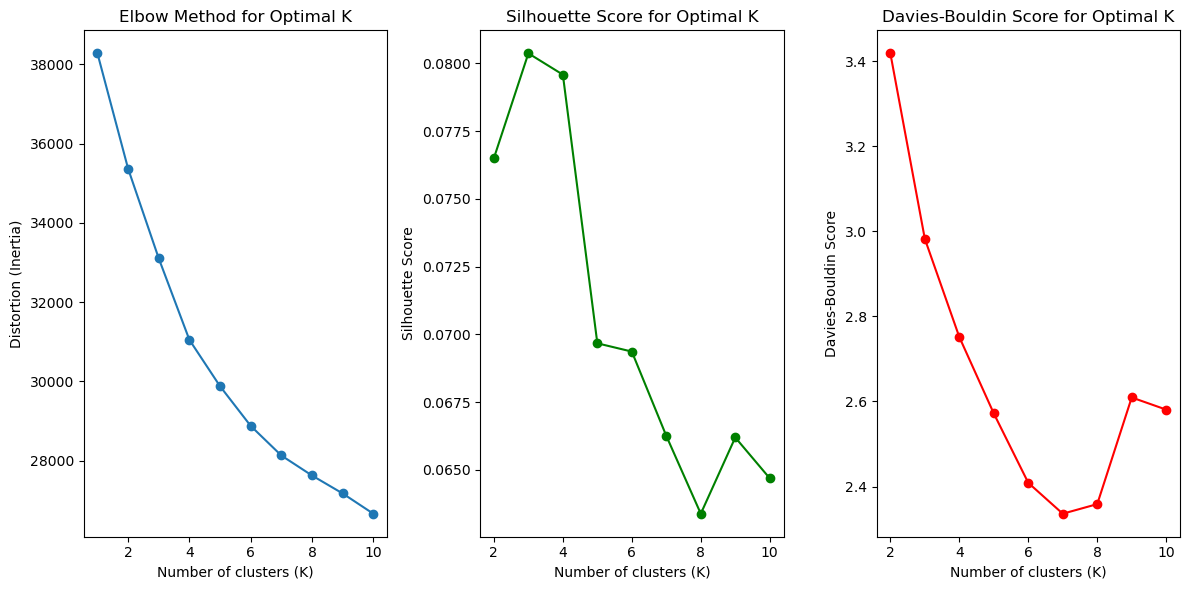

In [ ]:
#Choosing the optimal number of cluster K

#Using Elbow Method, Sillhouette Score, and Davies Bouldine

dist = []
sil_score = []
db_scores = []

K_range = range(1,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state = 123)
    kmeans.fit(df2_pca)
    labels = kmeans.labels_
    dist.append(kmeans.inertia_)

    #Sillhouette Score
    if k > 1:
        sil_score.append(silhouette_score(df2_pca, labels))
    else:
        sil_score.append(None)

    #David Bouildin Score
    if k > 1:
        db_scores.append(davies_bouldin_score(df2_pca, labels))
    else:
        db_scores.append(None)



#Plotting Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(K_range, dist, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion (Inertia)')

#Plotting Silhouette
plt.subplot(1, 3, 2)
plt.plot(K_range[1:], sil_score[1:], marker='o', color='g')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')

#Plotting Davies Bouildin
plt.subplot(1, 3, 3)
plt.plot(K_range, db_scores, marker='o', color='r')
plt.title('Davies-Bouldin Score for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Score')

plt.tight_layout()
plt.show()

In [ ]:
# Determine the optimal K based on the metrics

valid_sil_scores = [(score, K_range[idx]) for idx, score in enumerate(sil_score) if score is not None]
max_sil_score, optimal_k_sil = max(valid_sil_scores, key=lambda x: x[0])

valid_db_scores = [(score, K_range[idx]) for idx, score in enumerate(db_scores) if score is not None]
min_db_score, optimal_k_db = min(valid_db_scores, key=lambda x: x[0])

print(f"Optimal K based on Silhouette Score: {optimal_k_sil}")
print(f"Optimal K based on Davies-Bouldin Score: {optimal_k_db}")

Optimal K based on Silhouette Score: 3
Optimal K based on Davies-Bouldin Score: 7


By this metrics, we can see that in Elbow Method, the elbow can be seen between 3 and 4. In Sillhouette score, the peak is at K = 3, but in Davies Bouldin, the lowest score are found in 7.

In Davies Bouldin, lower score indicate well-separated and compact cluster, but seeing the score lies under 3.0 for K = 3, i think K = 3 will be the most optimal cluster

##### Let the Clustering Begin

In [ ]:
#Choosing the optimal K
optimal_k = optimal_k_sil
#Choosing K = 3 as in sillhouette score due

#Training the final K-Means model
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = final_kmeans.fit_predict(df2_pca)

df2['Cluster'] = final_labels
df2.head()

Gender  Purchase Amount (USD)  Size  Review Rating  Subscription Status  \
0       1              -0.285629     1      -0.907584                    1   
1       1               0.178852     1      -0.907584                    1   
2       1               0.558882     2      -0.907584                    1   
3       1               1.276716     0      -0.349027                    1   
4       1              -0.454531     0      -1.466141                    1   

   Discount Applied  Promo Code Used  Previous Purchases  \
0                 1                1           -0.785831   
1                 1                1           -1.616552   
2                 1                1           -0.162789   
3                 1                1            1.637107   
4                 1                1            0.391025   

   Frequency of Purchases       Age  Category_Clothing  Category_Footwear  \
0                0.507436  0.718913                  1                  0   
1                0.507436 -1.648629                  1                  0   
2                2.054365  0.390088                  1                  0   
3                2.054365 -1.517099                  0                  1   
4               -0.979997  0.061263                  1                  0   

   Category_Outerwear  Location_Alaska  Location_Arizona  Location_Arkansas  \
0                   0                0                 0                  0   
1                   0                0                 0                  0   
2                   0                0                 0                  0   
3                   0                0                 0                  0   
4                   0                0                 0                  0   

   Location_California  Location_Colorado  Location_Connecticut  \
0                    0                  0                     0   
1                    0                  0                     0   
2                    0                  0                     0   
3                    0                  0                     0   
4                    0                  0                     0   

   Location_Delaware  Location_Florida  Location_Georgia  Location_Hawaii  \
0                  0                 0                 0                0   
1                  0                 0                 0                0   
2                  0                 0                 0                0   
3                  0                 0                 0                0   
4                  0                 0                 0                0   

   Location_Idaho  Location_Illinois  Location_Indiana  Location_Iowa  \
0               0                  0                 0              0   
1               0                  0                 0              0   
2               0                  0                 0              0   
3               0                  0                 0              0   
4               0                  0                 0              0   

   Location_Kansas  Location_Kentucky  Location_Louisiana  Location_Maine  \
0                0                  1                   0               0   
1                0                  0                   0               1   
2                0                  0                   0               0   
3                0                  0                   0               0   
4                0                  0                   0               0   

   Location_Maryland  Location_Massachusetts  Location_Michigan  \
0                  0                       0                  0   
1                  0                       0                  0   
2                  0                       1                  0   
3                  0                       0                  0   
4                  0                       0                  0   

   Location_Minnesota  Location_Mississippi  Location_Missouri  

In [ ]:
df2['Cluster'].value_counts()

Cluster
1    1468
0    1222
2    1210
Name: count, dtype: int64

#### Clustered Data Visualization

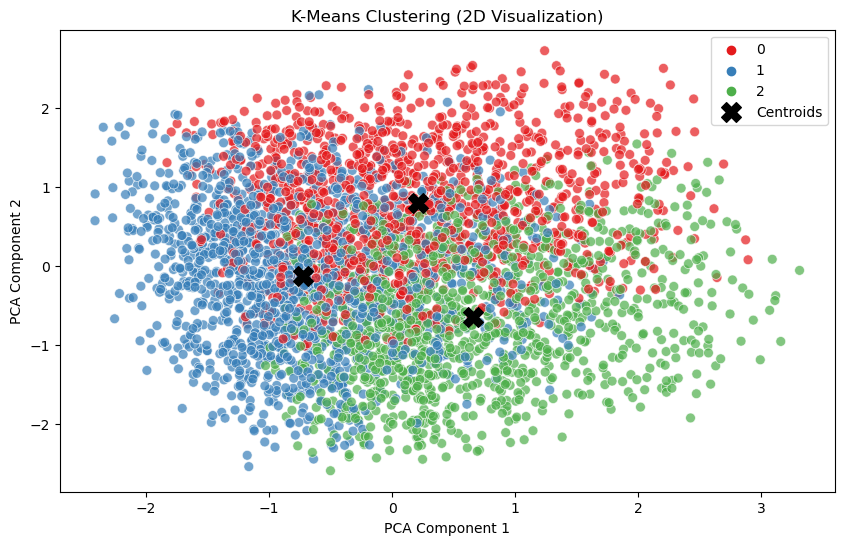

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df2_pca[:, 0], y=df2_pca[:, 1],
    hue=final_labels, palette='Set1',
    s=50, alpha=0.7
)
plt.scatter(
    final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1],
    color='black', marker='X', s=200, label='Centroids'
)
plt.title('K-Means Clustering (2D Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

The cluster seems overlap significantly, especially near the cluster boundaries, this indicates that the cluster are not well separated, which may suggest that the feature used in clustering do not clearly distinguish the groups, let's refine this by asessing the feature

##### Feature Evaluation

In [ ]:
#Evaluating the variance of feature

selector = VarianceThreshold(threshold=0.1)  # Remove low-variance features
selected_features = selector.fit_transform(df2)
selected_columns = df2.columns[selector.get_support()]
print(f"Selected Features: {selected_columns}")

Selected Features: Index(['Gender', 'Purchase Amount (USD)', 'Size', 'Review Rating',
       'Subscription Status', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Frequency of Purchases', 'Age',
       'Category_Clothing', 'Category_Footwear', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Payment Method_Cash',
       'Payment Method_Credit Card', 'Payment Method_Debit Card',
       'Payment Method_PayPal', 'Payment Method_Venmo',
       'Shipping Type_Express', 'Shipping Type_Free Shipping',
       'Shipping Type_Next Day Air', 'Shipping Type_Standard',
       'Shipping Type_Store Pickup', 'Cluster'],
      dtype='object')


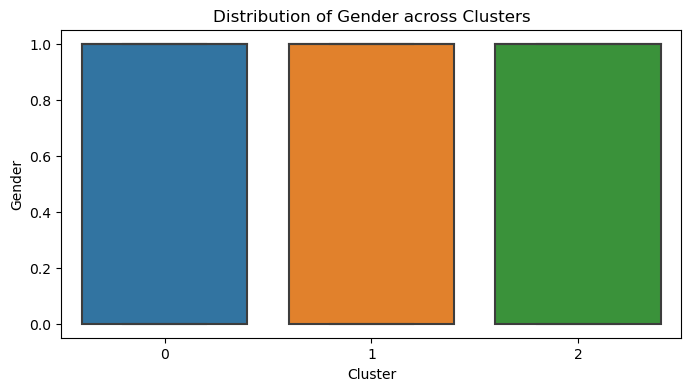

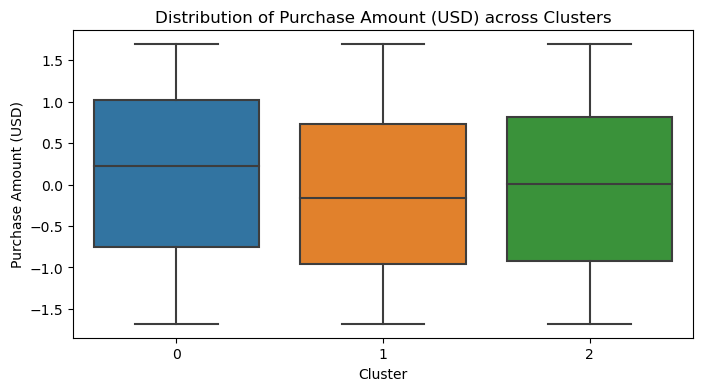

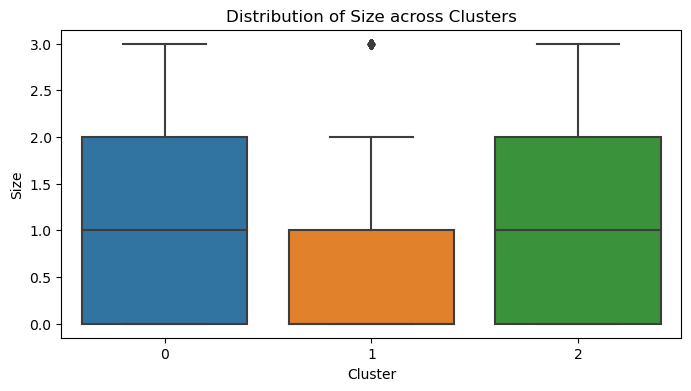

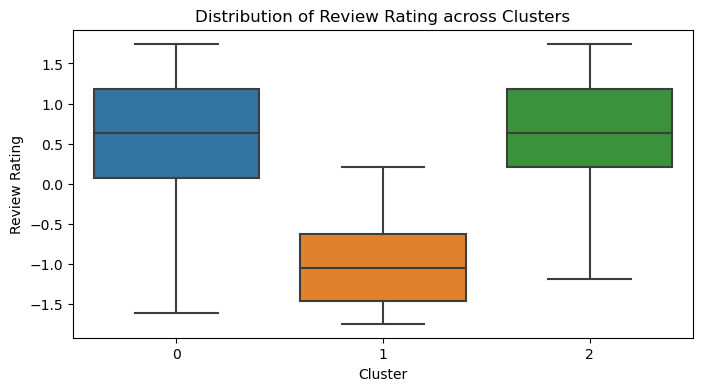

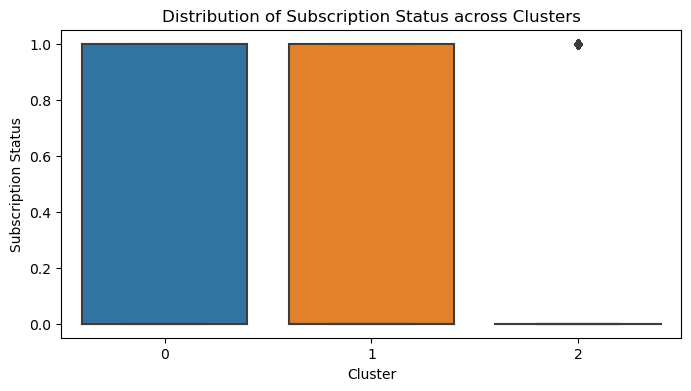

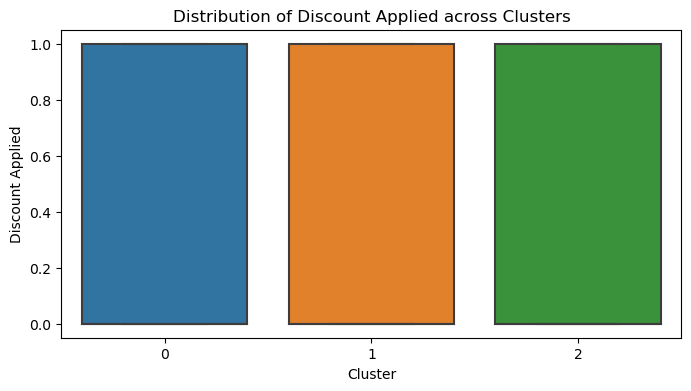

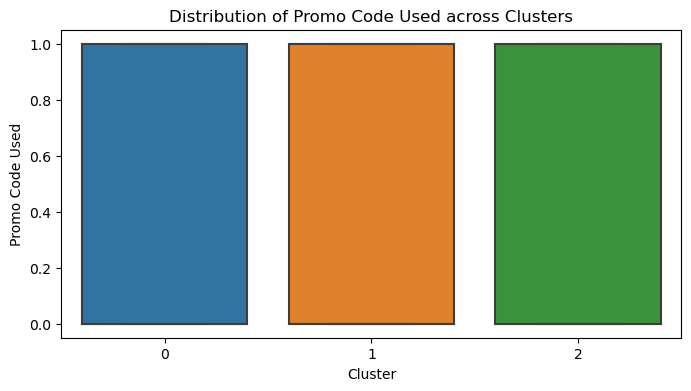

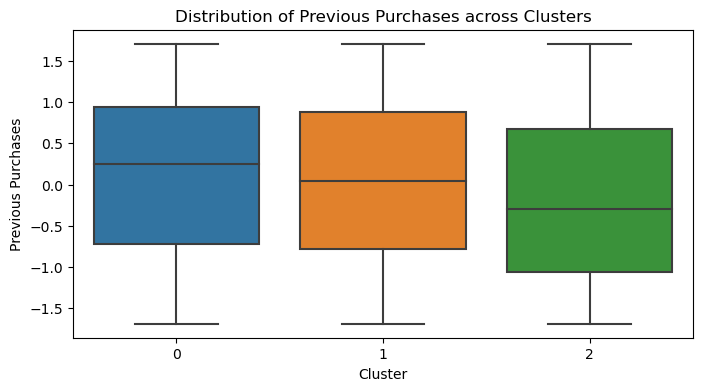

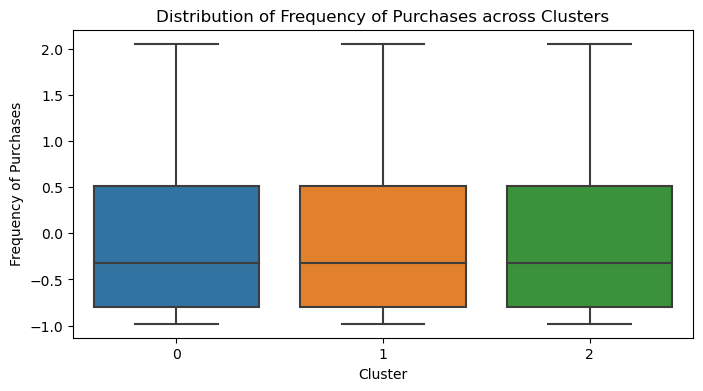

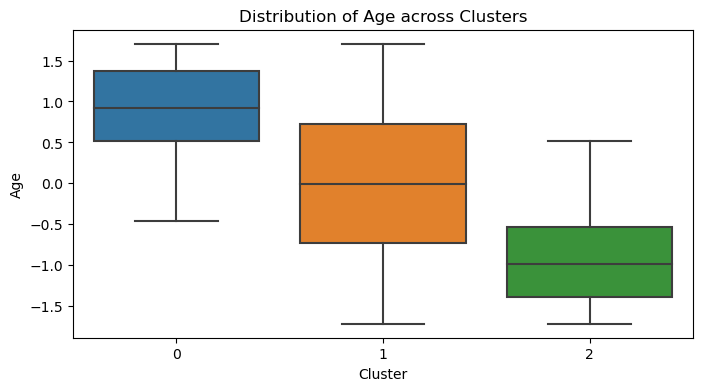

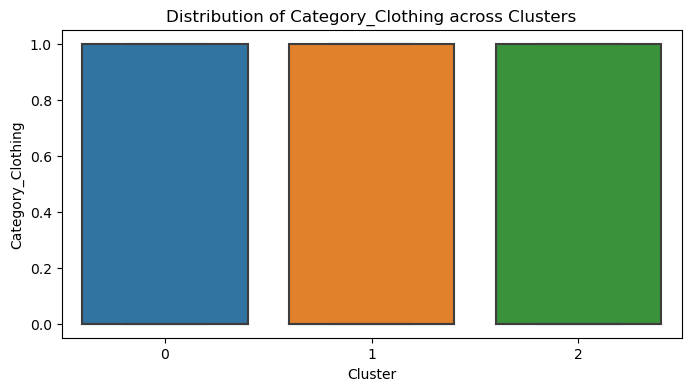

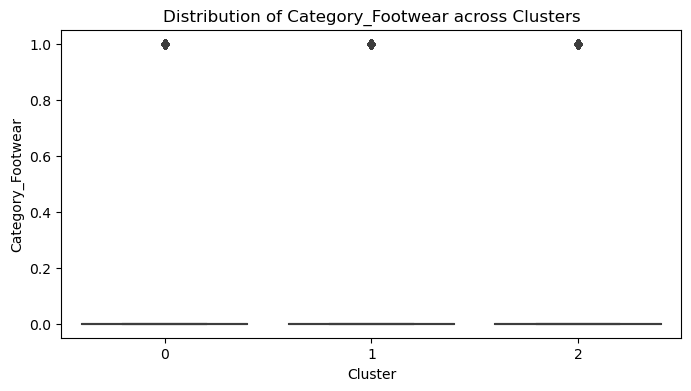

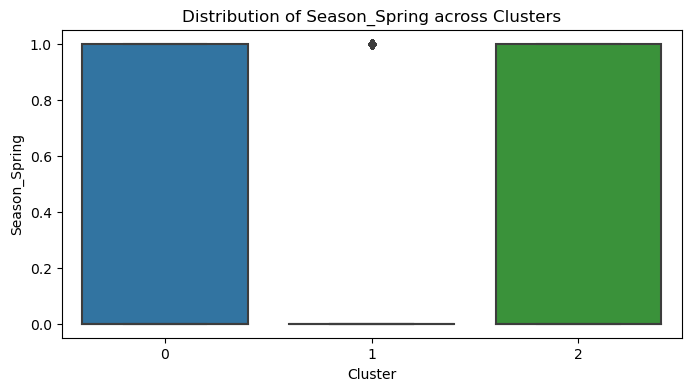

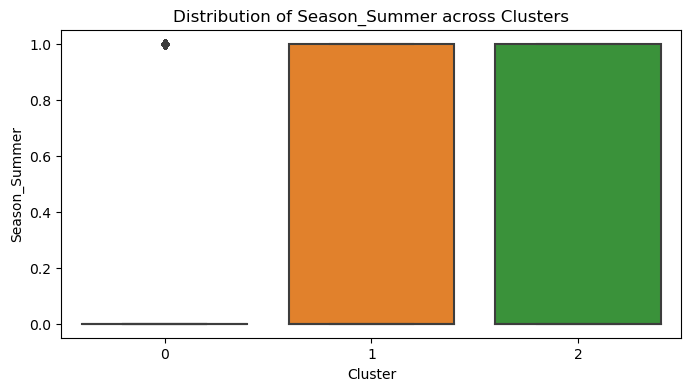

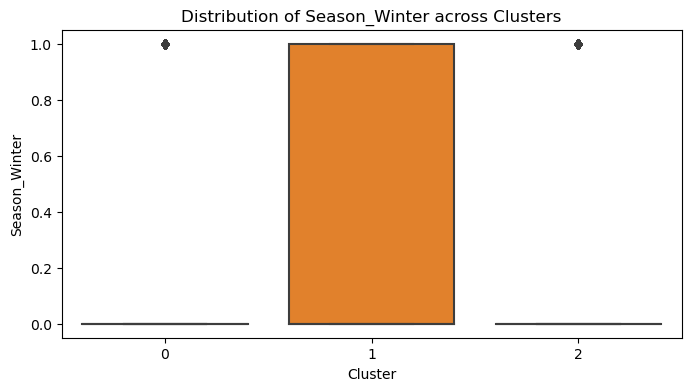

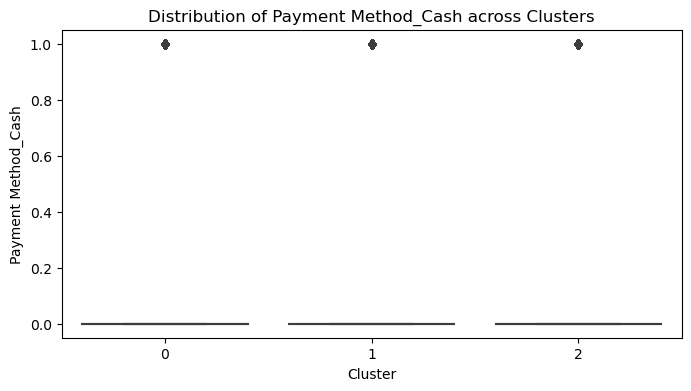

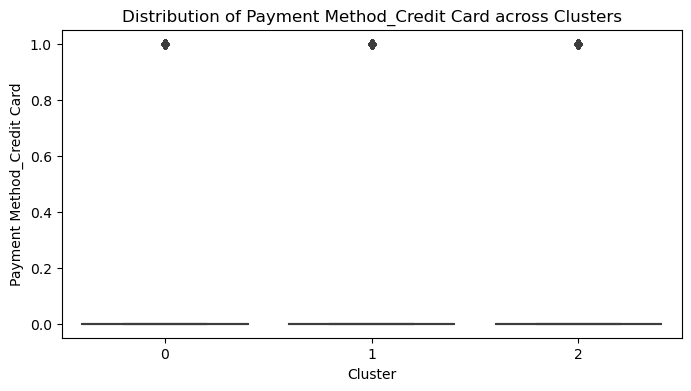

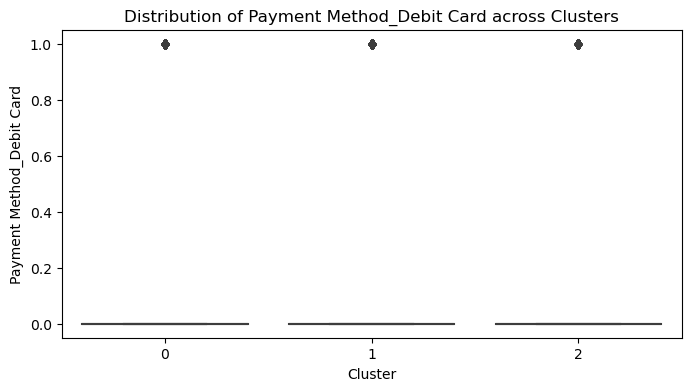

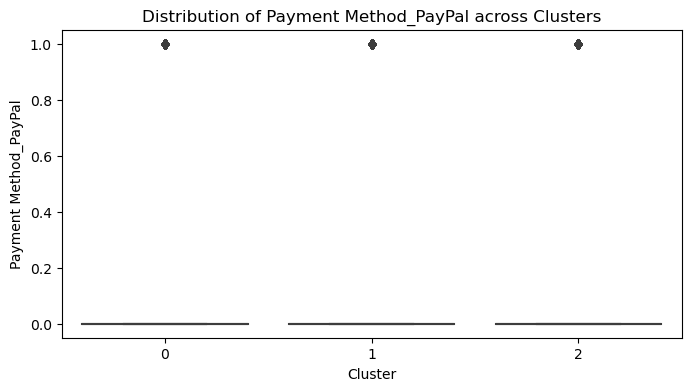

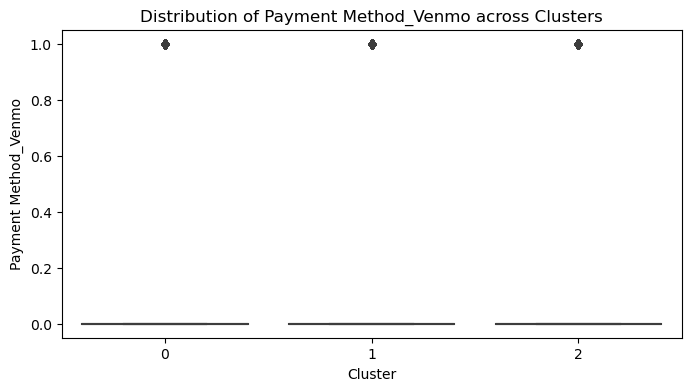

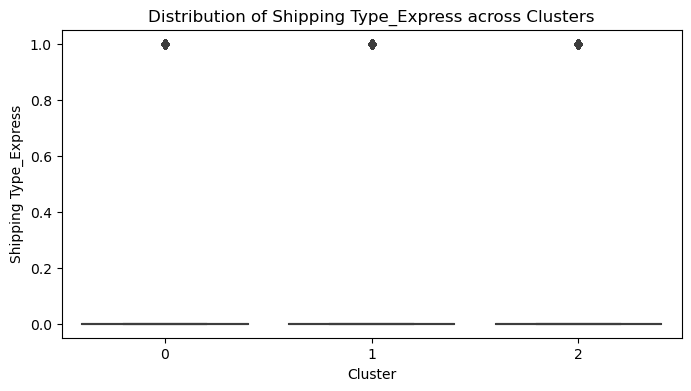

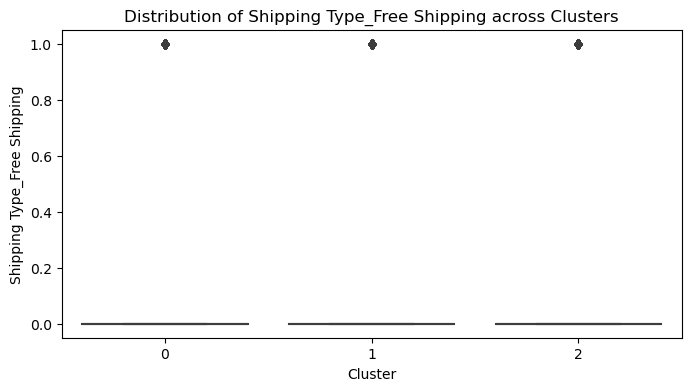

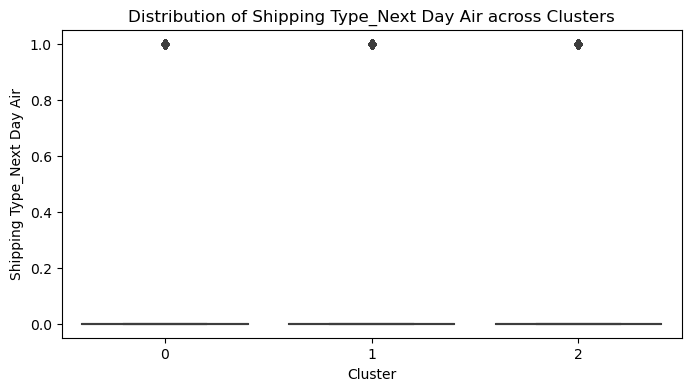

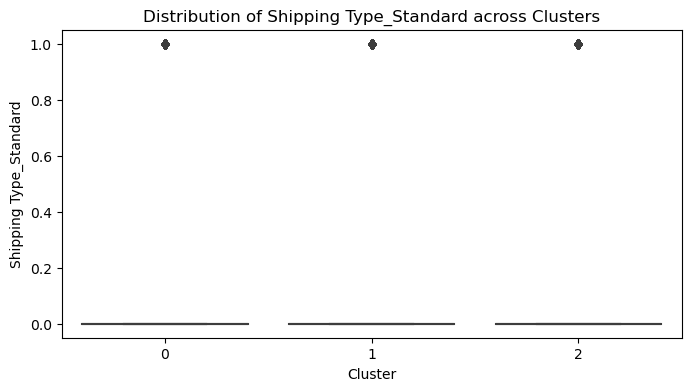

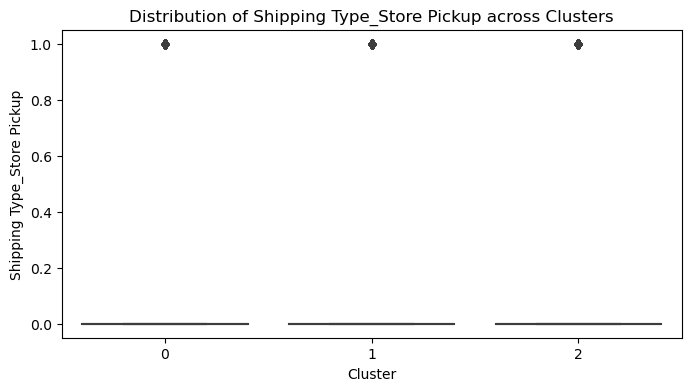

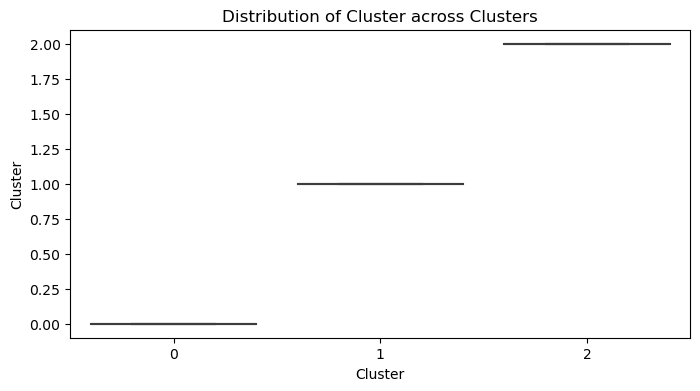

In [ ]:
#Visualize feature distributions within clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df2['Cluster'] = kmeans.fit_predict(selected_features)
for feature in selected_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=feature, data=df2)
    plt.title(f"Distribution of {feature} across Clusters")
    plt.show()

In [ ]:
#Use PCA to reduce dimensions and find key components
pca = PCA(n_components=2)
pca_features = pca.fit_transform(selected_features)

##### Fine Tuning the K-Means

after the feature was selected, we try to do evaluate the sillhouette, elbow, and david score for the model

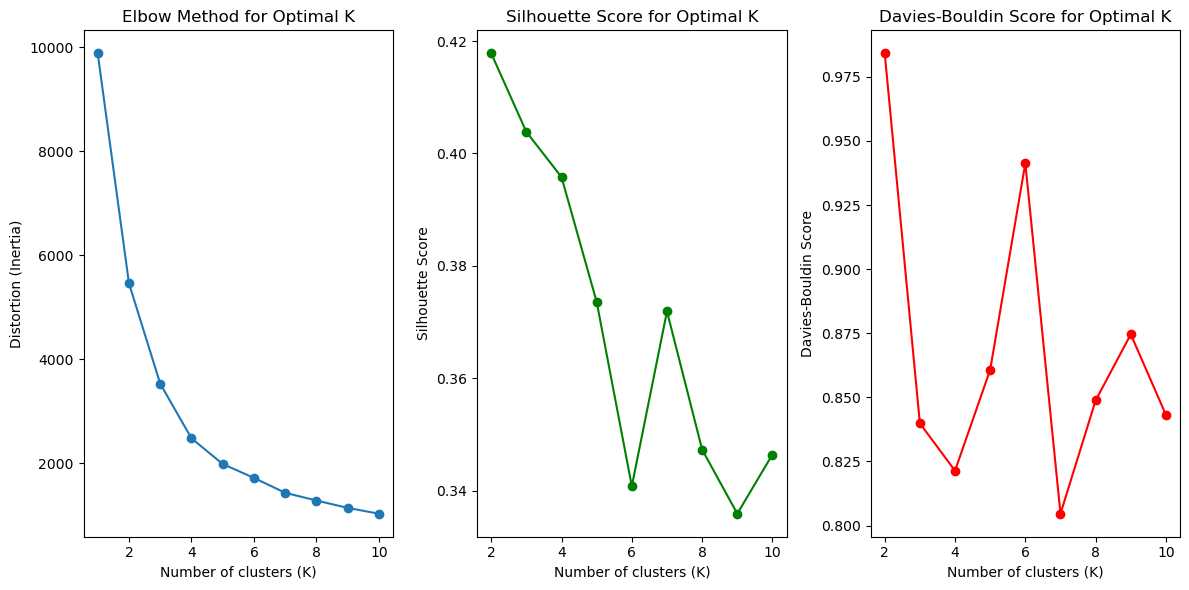

In [ ]:
dist = []
sil_score = []
db_scores = []

K_range = range(1,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state = 123)
    kmeans.fit(pca_features)
    labels = kmeans.labels_
    dist.append(kmeans.inertia_)

    #Sillhouette Score
    if k > 1:
        sil_score.append(silhouette_score(pca_features, labels))
    else:
        sil_score.append(None)

    #David Bouildin Score
    if k > 1:
        db_scores.append(davies_bouldin_score(pca_features, labels))
    else:
        db_scores.append(None)



#Plotting Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(K_range, dist, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion (Inertia)')

#Plotting Silhouette
plt.subplot(1, 3, 2)
plt.plot(K_range[1:], sil_score[1:], marker='o', color='g')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')

#Plotting Davies Bouildin
plt.subplot(1, 3, 3)
plt.plot(K_range, db_scores, marker='o', color='r')
plt.title('Davies-Bouldin Score for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Score')

plt.tight_layout()
plt.show()

Turns out after selection, the best cluster are K=2

In [ ]:
#Re-cluster with selected features and evaluate silhouette score
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(selected_features)

silhouette = silhouette_score(selected_features, clusters)
print(f"Silhouette Score with Selected Features: {silhouette}")

Silhouette Score with Selected Features: 0.11049581937747842


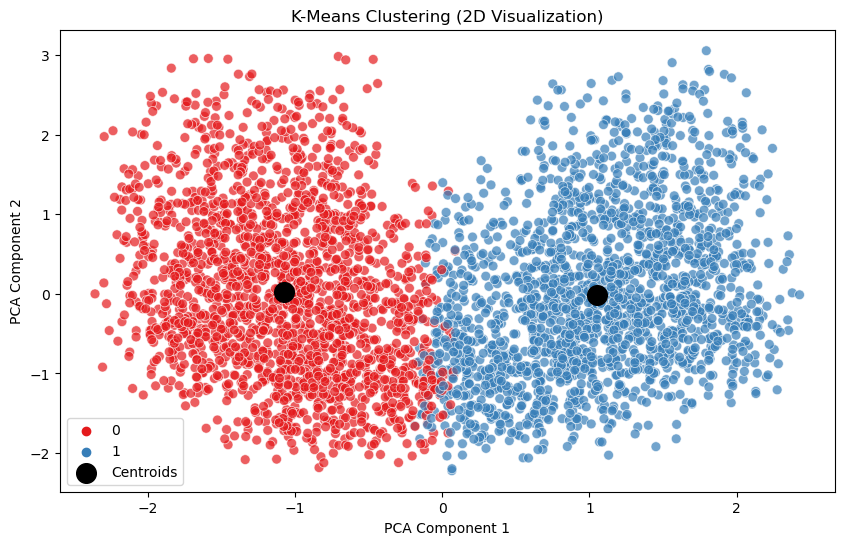

In [ ]:
centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x= pca_features[:, 0], y= pca_features[:, 1],
    hue=clusters, palette='Set1',
    s=50, alpha=0.7
)
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    color='black', marker='o', s=200, label='Centroids'
)
plt.title('K-Means Clustering (2D Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [ ]:
#Re-label the cluster

df2['Cluster'] = clusters
df2.head()

Gender  Purchase Amount (USD)  Size  Review Rating  Subscription Status  \
0       1              -0.285629     1      -0.907584                    1   
1       1               0.178852     1      -0.907584                    1   
2       1               0.558882     2      -0.907584                    1   
3       1               1.276716     0      -0.349027                    1   
4       1              -0.454531     0      -1.466141                    1   

   Discount Applied  Promo Code Used  Previous Purchases  \
0                 1                1           -0.785831   
1                 1                1           -1.616552   
2                 1                1           -0.162789   
3                 1                1            1.637107   
4                 1                1            0.391025   

   Frequency of Purchases       Age  Category_Clothing  Category_Footwear  \
0                0.507436  0.718913                  1                  0   
1                0.507436 -1.648629                  1                  0   
2                2.054365  0.390088                  1                  0   
3                2.054365 -1.517099                  0                  1   
4               -0.979997  0.061263                  1                  0   

   Category_Outerwear  Location_Alaska  Location_Arizona  Location_Arkansas  \
0                   0                0                 0                  0   
1                   0                0                 0                  0   
2                   0                0                 0                  0   
3                   0                0                 0                  0   
4                   0                0                 0                  0   

   Location_California  Location_Colorado  Location_Connecticut  \
0                    0                  0                     0   
1                    0                  0                     0   
2                    0                  0                     0   
3                    0                  0                     0   
4                    0                  0                     0   

   Location_Delaware  Location_Florida  Location_Georgia  Location_Hawaii  \
0                  0                 0                 0                0   
1                  0                 0                 0                0   
2                  0                 0                 0                0   
3                  0                 0                 0                0   
4                  0                 0                 0                0   

   Location_Idaho  Location_Illinois  Location_Indiana  Location_Iowa  \
0               0                  0                 0              0   
1               0                  0                 0              0   
2               0                  0                 0              0   
3               0                  0                 0              0   
4               0                  0                 0              0   

   Location_Kansas  Location_Kentucky  Location_Louisiana  Location_Maine  \
0                0                  1                   0               0   
1                0                  0                   0               1   
2                0                  0                   0               0   
3                0                  0                   0               0   
4                0                  0                   0               0   

   Location_Maryland  Location_Massachusetts  Location_Michigan  \
0                  0                       0                  0   
1                  0                       0                  0   
2                  0                       1                  0   
3                  0                       0                  0   
4                  0                       0                  0   

   Location_Minnesota  Location_Mississippi  Location_Missouri  

Now with feature analysis, the cluster are better separated with less overlaps, it shows clear boundaries between clusters, which indicates that the PCA-reduced dimensions capture the clustering structure effectively

### 2. C. Costumer Cluster Characteristic

In [ ]:
df2.groupby('Cluster').agg(['mean', 'median', 'std'])

Gender                  Purchase Amount (USD)                      \
             mean median       std                  mean    median       std   
Cluster                                                                        
0        0.690599    1.0  0.462366              0.040878  0.052176  1.006247   
1        0.669552    1.0  0.470494             -0.040295 -0.032275  0.992669   

             Size                  Review Rating                      \
             mean median       std          mean    median       std   
Cluster                                                                
0        0.981405    1.0  1.038616     -0.032674 -0.069748  0.998590   
1        0.899185    1.0  1.015930      0.032209  0.069891  1.000853   

        Subscription Status                  Discount Applied         \
                       mean median       std             mean median   
Cluster                                                                
0                  0.286674    0.0  0.452325         0.443182    0.0   
1                  0.253564    0.0  0.435162         0.417006    0.0   

                  Promo Code Used                  Previous Purchases  \
              std            mean median       std               mean   
Cluster                                                                 
0        0.496890        0.443182    0.0  0.496890           0.118587   
1        0.493189        0.417006    0.0  0.493189          -0.116897   

                            Frequency of Purchases                      \
           median       std                   mean    median       std   
Cluster                                                                  
0        0.183345  0.987404              -0.006681 -0.325526  1.007304   
1       -0.162789  0.999076               0.006586 -0.325526  0.993217   

              Age                     Category_Clothing                   \
             mean    median       std              mean median       std   
Cluster                                                                    
0        0.862231  0.850444  0.510687          0.436467    0.0  0.496075   
1       -0.849939 -0.859448  0.523158          0.454175    0.0  0.498022   

        Category_Footwear                  Category_Outerwear         \
                     mean median       std               mean median   
Cluster                                                                
0                0.164256    0.0  0.370604           0.084194    0.0   
1                0.143075    0.0  0.350239           0.081976    0.0   

                  Location_Alaska                  Location_Arizona         \
              std            mean median       std             mean median   
Cluster                                                                      
0        0.277751        0.017562    0.0  0.131387         0.017562    0.0   
1        0.274397        0.019348    0.0  0.137781         0.015784    0.0   

                  Location_Arkansas                  Location_California  \
              std              mean median       std                mean   
Cluster                                                                    
0        0.131387          0.019628    0.0  0.138754            0.022211   
1        0.124671          0.020876    0.0  0.143005            0.026477   

                         Location_Colorado                   \
        median       std              mean median       std   
Cluster                                                       
0          0.0  0.147406          0.018079    0.0  0.133270   
1          0.0  0.160589          0.020367    0.0  0.141287   

        Location_Connecticut                  Location_Delaware         \
                        mean median       std              mean median   
Cluster                                                                  
0                   0.022727    0.0  0.149071          0.019112    0.0   
1                   0.017

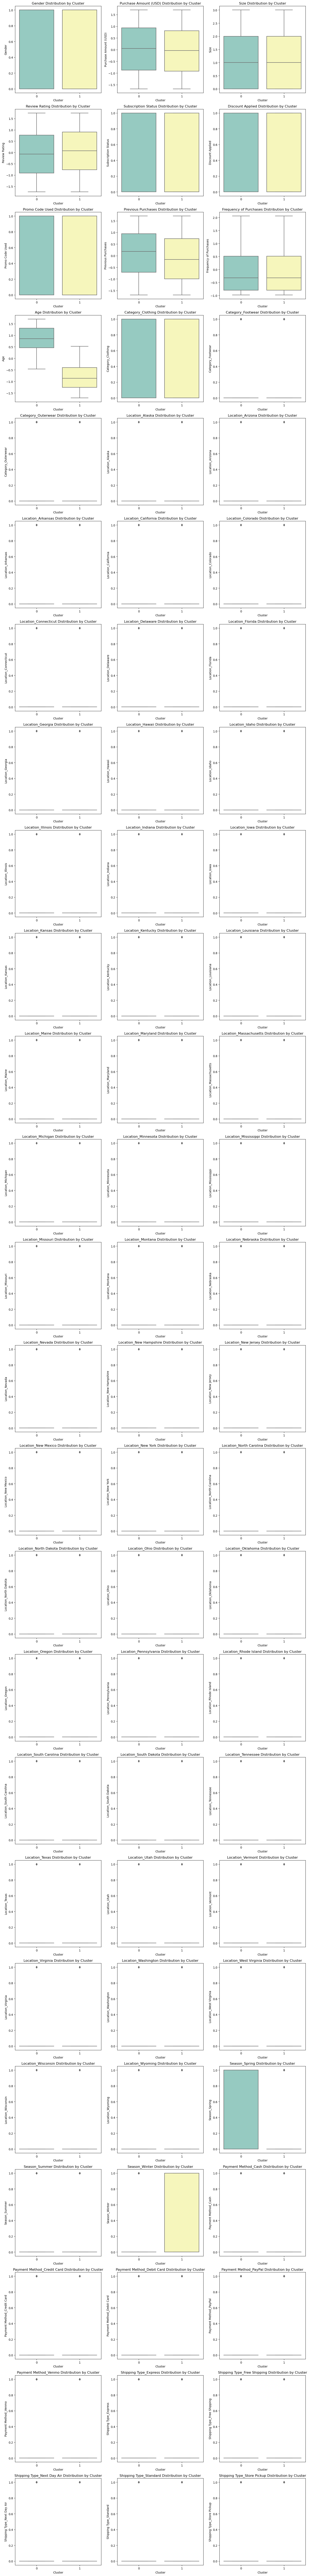

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_clusters(df, columns, cluster_column='Cluster'):
    num_columns = len(columns)
    rows = (num_columns + 2) // 3
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        sns.boxplot(data=df, x=cluster_column, y=column, ax=axes[i], palette='Set3')
        axes[i].set_title(f'{column} Distribution by {cluster_column}')
        axes[i].set_xlabel(cluster_column)
        axes[i].set_ylabel(column)

    # Hide unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

analyze_clusters(df2, anacol)


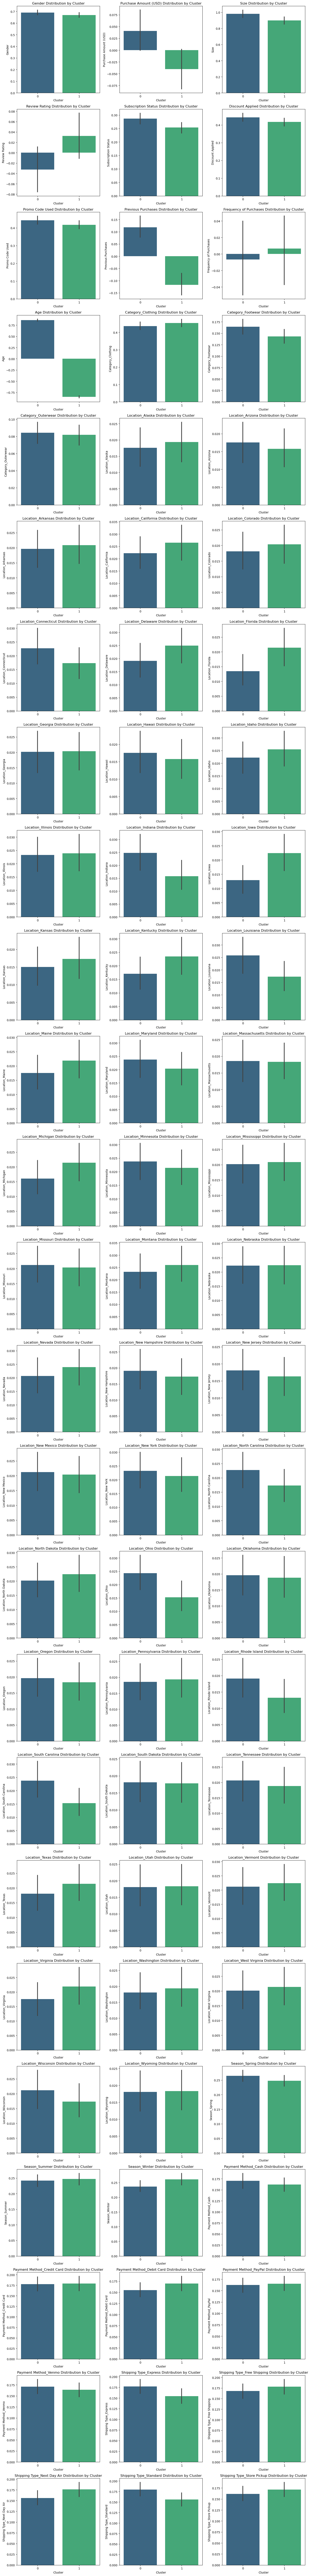

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_clusters(df, columns, cluster_column='Cluster'):
    num_columns = len(columns)
    rows = (num_columns + 2) // 3
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        sns.barplot(x=cluster_column, y=column, data=df, ax=axes[i], palette = 'viridis')
        axes[i].set_title(f'{column} Distribution by {cluster_column}')
        axes[i].set_xlabel(cluster_column)
        axes[i].set_ylabel(column)

    # Hide unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

anacol = df2.drop(columns='Cluster').columns
analyze_clusters(df2, anacol)

**Usage distribution analysis to understand the cluster characteristic**

Feature with high variation among clusters are likely the most important for segmenting the customers, it's more likely to be more influential in defininig the cluster's characeristic. This feature couls be differentiate by mean of a feature per cluster, the bar represent the averagre value of the feature for that specific cluster, while the boxplot could gice us insight of the data distribution for each cluster. This can be interpreted by seeing the distinctiveess between bar heights

Let's analyze these plot thoroughly:

1. The **Gender** didn't distinct much between bar, indicating that gender might not be the feature used in clustering, but it could indicate that different proportion in cluster 1 might indicate each cluster are dominated by 1 gender but unsure which
2. The **Subscription Status**, **Discount Applied**, **Promo Code Used**, are getting lower each cluster, this could indicate that these feature might be participating in clustering component, as lower cluster suggest more usage of subscription, discount, and promo code, compared to higher cluster
3. **Puchase Amount** feature have very distinct plot, the cluster difference between iqr of each cluster may indicating lot of variation in the Purchase Amount value, from this plot we can interpret that in cluster 0, most data point have positive Purchase Amount, while cluster 1 has spreaded to the negative side, indicating that cluster 1 are filled with much lower Purchase Amount compared to other
4. similar with Purchase Amount, **Age, Previous Purchases, Frequency of Purchases and **Review Ratings** also have quite distinctiveness between it's distribution, let's break it down one by one.
    - From **Age**, the distribution between cluster can indicate different age group, cluster 0 with highest average age (close to 1) indicating that the customer in that cluster are relatively older, cluster 1 could represent younger age groups
    - From **Previous Purchases**, cluster 0 has the higest previous purchases indicatng that this group tends to have history of more frequent purchases, cluster 1 have negative previous purchase average indicating this cluster contains individuals with the least to no purchase history
    - From **Frequency of Purchases**, cluster 1 are filled with sligtly positive mean freq suggesting the tendency of making frequent purchase, indicating more consistent purchasing pattern among other cluster (seems like indicating clientele), cluster 0 shows slightly negative mean freq with lower variability indicating lower average purchase tendency
    - **Review Ratings** average in cluster 0 are negative arount -0.4, indicating individuals in this cluster associated with poor reviews or dissatisfaction, giving the consistent negative ratings, while in cluster 1 generally give favorable reviews, with high error bar indicating consistent positive ratings.

5. **Size** distribution plot shows that cluster 0 has the higest average size suggesting the customer in this cluster tend to have larger size, while cluster 1 has the smaller average size indicating smaller cluster of size of customer

Other feature may be interpreted as same as how i interpret it above, but the raw conclusion we can take from some of the feature are:
- ***Cluster 0***: Demographicly tend to be older age range, Behavioural tent to have high purchase amount, most significant purchase history, and regularly purchasing. This cluster utilize subscription, discounts, and promo codes the most compared to other cluster, and mostly leave poor reviews with an average score around -0.4 and consistent negative feedbacks. Also in this cluster tend to have larger in size.
- ***CLuster 1***: Demographicly in younger ages range with lower purchase ammount, minimal purchase history, and slightly positive purchase freq indicating stable yet infrequent purchase frequency, with less usage of subscription, discount, and promo code usage and mostly giving consistent favorable positive review, and having smaller average in size


**Summary and Insights**
- **Cluster 0:**  Represents older, highly engaged, but dissatisfied customers who are frequent buyers. **Focus on improving satisfaction through tailored loyalty programs and resolving common issues.**
- **Cluster 1:** Represents younger, stable, and satisfied customers who make consistent but low-value purchases. **Nurture these customers with strategies for long-term retention and gradual growth into loyal buyers.**


======================================================================

##### Additional cute Information that might be interesting: Feature Importance Analysis

Using PCA, PCA component can suggest what features are driving the variability in the data. In the clustering, PC 1 and 2 are usually used such because PC 1 explains 50% of the variance, meaning this component captures 50% of the total information from the data, PC2 explain 30% variance, so it capture additional 30%. These data combined together explain the 80% of the variance in the data

In [ ]:
explained_variance = pca.explained_variance_ratio_
pca_components = pd.DataFrame(pca.components_, index=[f'PC{i+1}' for i in range(len(explained_variance))])
pca_components

0         1         2         3         4         5         6   \
PC1   0.007715  0.270093  0.756556  0.513502 -0.010000 -0.008683 -0.008683   
PC2   0.034786  0.066986  0.244917  0.078778  0.029204  0.034655  0.034655   
PC3   0.020987 -0.703759  0.448649 -0.222678  0.016696  0.026973  0.026973   
PC4  -0.004048  0.256960 -0.269824  0.293188  0.007957 -0.001998 -0.001998   
PC5  -0.017164  0.595778  0.266676 -0.593259 -0.011780 -0.016075 -0.016075   
PC6  -0.027434 -0.047293 -0.142876  0.489723 -0.024813 -0.033703 -0.033703   
PC7   0.399711  0.047365 -0.029348  0.022300  0.418517  0.571233  0.571233   
PC8  -0.027806  0.009826  0.005920 -0.022956  0.003204 -0.004218 -0.004218   
PC9  -0.010425  0.010110 -0.000245 -0.019258  0.001597 -0.001306 -0.001306   
PC10 -0.006300  0.014876  0.015240  0.014706  0.004760 -0.003319 -0.003319   
PC11 -0.006062 -0.009862  0.000992  0.005052  0.046015 -0.011715 -0.011715   
PC12 -0.079024 -0.000526 -0.001533  0.010544  0.034910  0.028828  0.028828   
PC13  0.090728  0.013527 -0.003424  0.008549 -0.071184 -0.008857 -0.008857   
PC14  0.028497  0.010741 -0.006902 -0.003569 -0.006558 -0.016625 -0.016625   
PC15 -0.042415  0.009695  0.009247 -0.019924 -0.018540  0.026601  0.026601   
PC16 -0.028005  0.015416 -0.014340  0.000761  0.041634  0.002304  0.002304   
PC17 -0.077449 -0.007079  0.008711  0.008918  0.027221  0.019405  0.019405   
PC18 -0.022087  0.003095  0.001037  0.013105 -0.008564  0.003105  0.003105   
PC19  0.854801  0.002690 -0.013152 -0.006512 -0.425251 -0.142148 -0.142148   
PC20 -0.101961  0.009273  0.003267  0.003015  0.015646  0.028116  0.028116   
PC21 -0.262205  0.003299 -0.002180  0.002971 -0.782546  0.377870  0.377870   
PC22 -0.016855 -0.012007 -0.000410  0.004821 -0.105423  0.050508  0.050508   
PC23 -0.008520  0.004318  0.004586  0.001964 -0.033199  0.014954  0.014954   
PC24  0.006451  0.003365  0.000083 -0.002448 -0.003433 -0.001784 -0.001784   
PC25  0.002234 -0.001958  0.001145 -0.002491  0.014817 -0.001807 -0.001807   
PC26  0.008657 -0.000624 -0.002404 -0.000382 -0.007482  0.001632  0.001632   
PC27 -0.003205  0.000635 -0.000213 -0.003176 -0.019605  0.008402  0.008402   
PC28  0.007155 -0.000168 -0.000253 -0.002929  0.007854 -0.003661 -0.003661   
PC29  0.002743 -0.001796 -0.002971  0.001995  0.010202 -0.001417 -0.001417   
PC30  0.002280  0.001735  0.003165 -0.000195 -0.002247 -0.000191 -0.000191   
PC31 -0.007011 -0.001349 -0.000637 -0.000126  0.005138  0.000947  0.000947   
PC32  0.003830 -0.002031  0.001410  0.000066 -0.010646  0.000572  0.000572   
PC33  0.004330 -0.004394 -0.001905  0.002624 -0.005842  0.001173  0.001173   
PC34 -0.002510  0.000711 -0.001309 -0.000196 -0.016082  0.005265  0.005265   
PC35  0.010772  0.002398 -0.000014 -0.001951  0.004019 -0.005620 -0.005620   
PC36 -0.008210  0.004648 -0.000660  0.000074  0.002034  0.002873  0.002873   
PC37 -0.003407  0.003765  0.002770 -0.001647 -0.012369  0.006450  0.006450   
PC38 -0.002514 -0.001758 -0.002199 -0.000352 -0.000903  0.000852  0.000852   
PC39  0.003929 -0.001263 -0.001495  0.003147 -0.009314 -0.000186 -0.000186   
PC40 -0.004994  0.003918  0.000268 -0.002597 -0.000215  0.001214  0.001214   
PC41 -0.017241 -0.001347  0.004120  0.001717 -0.007824  0.005576  0.005576   
PC42 -0.002525 -0.003185 -0.004558  0.002157 -0.000417 -0.000459 -0.000459   
PC43 -0.003584 -0.002184  0.003622  0.001707  0.006020 -0.001022 -0.001022   
PC44  0.004733  0.002138  0.002789  0.003656 -0.012127  0.003962  0.003962   
PC45 -0.007037 -0.000588 -0.003001 -0.000900  0.023844 -0.008984 -0.008984   

            7         8         9         10        11        12        13  \
PC1  -0.091775 -0.068350 -0.276721 -0.005310  0.003771 -0.006177  0.003086   
PC2   0.723285  0.033748  0.631862 -0.012991  0.003526 -0.002088  0.002593   
PC3  -0.133667  0.479752  0.051235 -0.001096 -0.002532  0.005686 -0.003608   
PC4   0.176073  0.836674 -0.206437 -0.005821  0.007487 -0.001019  0.004285   
PC5  -0.311209  0.239294  0.25510

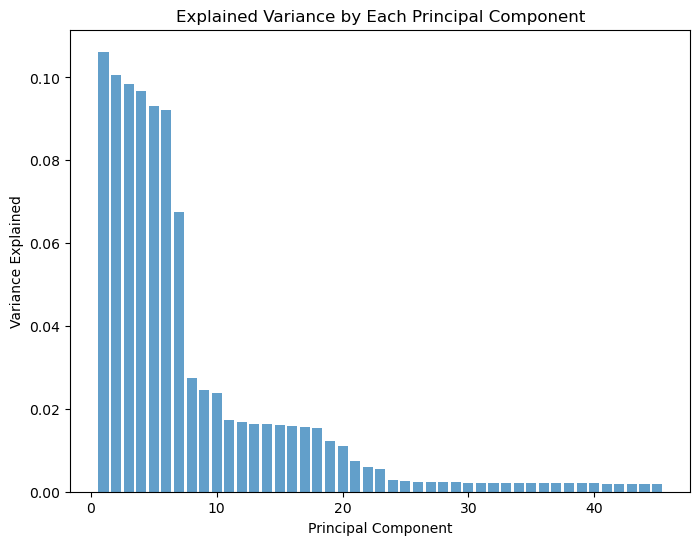

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Each Principal Component')
plt.show()

Plot above displays the explained variance by each PC, from 1 to 45, the Y axis shows the ammount of variance explained by each principal component, which in the plot proof that PC1 and PC2 are the largest amount of variance from the dataset